In [61]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [62]:
data = pd.read_csv('../Data/synthetic_COPD_data.csv')

In [63]:
summary_stats = data.describe(include='all')
summary_stats

,Age,Gender,Smoking_Status,Biomass_Fuel_Exposure,Occupational_Exposure,Family_History_COPD,BMI,Location,Air_Pollution_Level,Respiratory_Infections_Childhood,COPD_Diagnosis
count,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.00000
unique,NaN,2,3,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN
top,NaN,Male,Current,NaN,NaN,NaN,NaN,Pokhara,NaN,NaN,NaN
freq,NaN,514,357,NaN,NaN,NaN,NaN,110,NaN,NaN,NaN
mean,55.033000,NaN,NaN,0.494000,0.517000,0.504000,26.682860,NaN,136.184000,0.486000,0.31700
std,15.003233,NaN,NaN,0.500214,0.499961,0.500234,4.797422,NaN,66.517191,0.500054,0.46554
min,30.000000,NaN,NaN,0.000000,0.000000,0.000000,18.510000,NaN,50.000000,0.000000,0.00000
25%,42.000000,NaN,NaN,0.000000,0.000000,0.000000,22.587500,NaN,84.000000,0.000000,0.00000
50%,55.000000,NaN,NaN,0.000000,1.000000,1.000000,26.440000,NaN,121.000000,0.000000,0.00000
75%,68.250000,NaN,NaN,1.000000,1.000000,1.000000,30.662500,NaN,171.250000,1.000000,1.00000


### 1. Univariate Analysis

#### 1.1. Summary Statistics

In [64]:
summary_stats = data.describe(include='all')
summary_stats

,Age,Gender,Smoking_Status,Biomass_Fuel_Exposure,Occupational_Exposure,Family_History_COPD,BMI,Location,Air_Pollution_Level,Respiratory_Infections_Childhood,COPD_Diagnosis
count,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.00000
unique,NaN,2,3,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN
top,NaN,Male,Current,NaN,NaN,NaN,NaN,Pokhara,NaN,NaN,NaN
freq,NaN,514,357,NaN,NaN,NaN,NaN,110,NaN,NaN,NaN
mean,55.033000,NaN,NaN,0.494000,0.517000,0.504000,26.682860,NaN,136.184000,0.486000,0.31700
std,15.003233,NaN,NaN,0.500214,0.499961,0.500234,4.797422,NaN,66.517191,0.500054,0.46554
min,30.000000,NaN,NaN,0.000000,0.000000,0.000000,18.510000,NaN,50.000000,0.000000,0.00000
25%,42.000000,NaN,NaN,0.000000,0.000000,0.000000,22.587500,NaN,84.000000,0.000000,0.00000
50%,55.000000,NaN,NaN,0.000000,1.000000,1.000000,26.440000,NaN,121.000000,0.000000,0.00000
75%,68.250000,NaN,NaN,1.000000,1.000000,1.000000,30.662500,NaN,171.250000,1.000000,1.00000


#### 1.2. Histograms

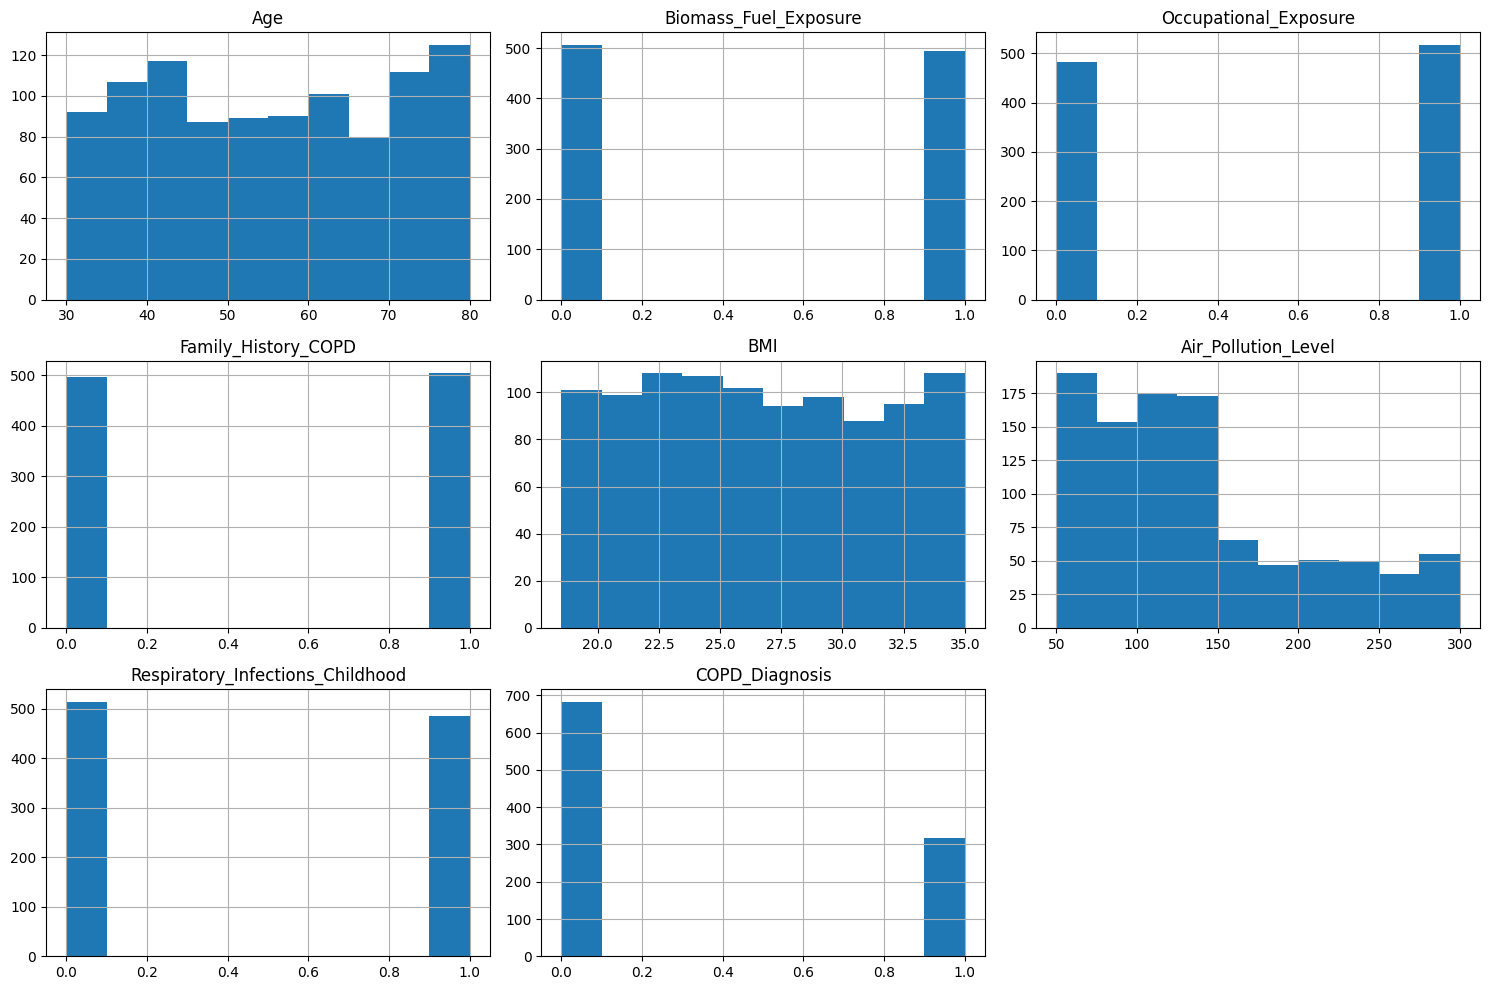

In [65]:
# Histograms for numerical columns
data.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

#### 1.3. Box Plots

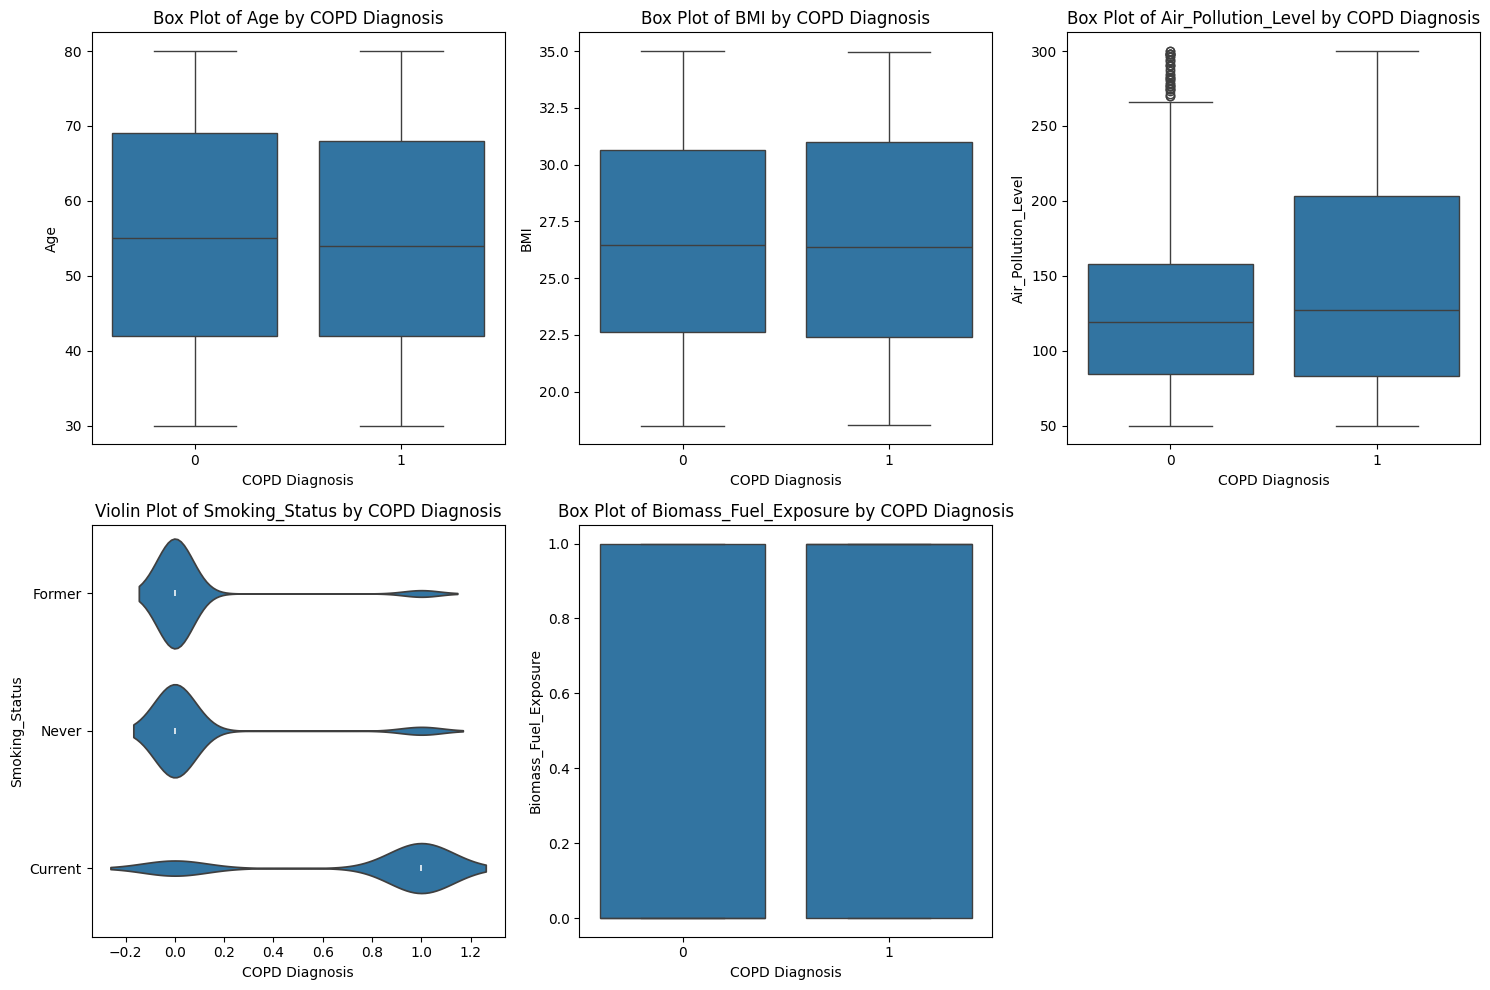

In [75]:
# List of columns to compare with COPD_Diagnosis
columns_to_compare = ['Age', 'BMI', 'Air_Pollution_Level', 'Smoking_Status', 'Biomass_Fuel_Exposure']

# The number of plots per row
plots_per_row = 3
n_columns = len(columns_to_compare)
n_rows = (n_columns + plots_per_row - 1) // plots_per_row  

# Create subplots
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(15, 5 * n_rows))
axes = axes.flatten()  

for i, column in enumerate(columns_to_compare):
    if data[column].dtype == 'object':
        # Use violin plot for categorical data
        sns.violinplot(x='COPD_Diagnosis', y=column, data=data, ax=axes[i])
        axes[i].set_title(f'Violin Plot of {column} by COPD Diagnosis')
    else:
        sns.boxplot(x='COPD_Diagnosis', y=column, data=data, ax=axes[i])
        axes[i].set_title(f'Box Plot of {column} by COPD Diagnosis')
    
    axes[i].set_xlabel('COPD Diagnosis')
    axes[i].set_ylabel(column)

# Hide any unused subplots
for j in range(i + 1, n_rows * plots_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2. Bivariate Analysis
#### 2.1. Correlation Matrix

In [67]:
data_numeric = data.copy()
data_numeric['Gender'] = data_numeric['Gender'].map({'Male': 1, 'Female': 0})
data_numeric['Smoking_Status'] = data_numeric['Smoking_Status'].map({'Never': 0, 'Former': 1, 'Current': 2})
data_numeric['Location'] = data_numeric['Location'].astype('category').cat.codes

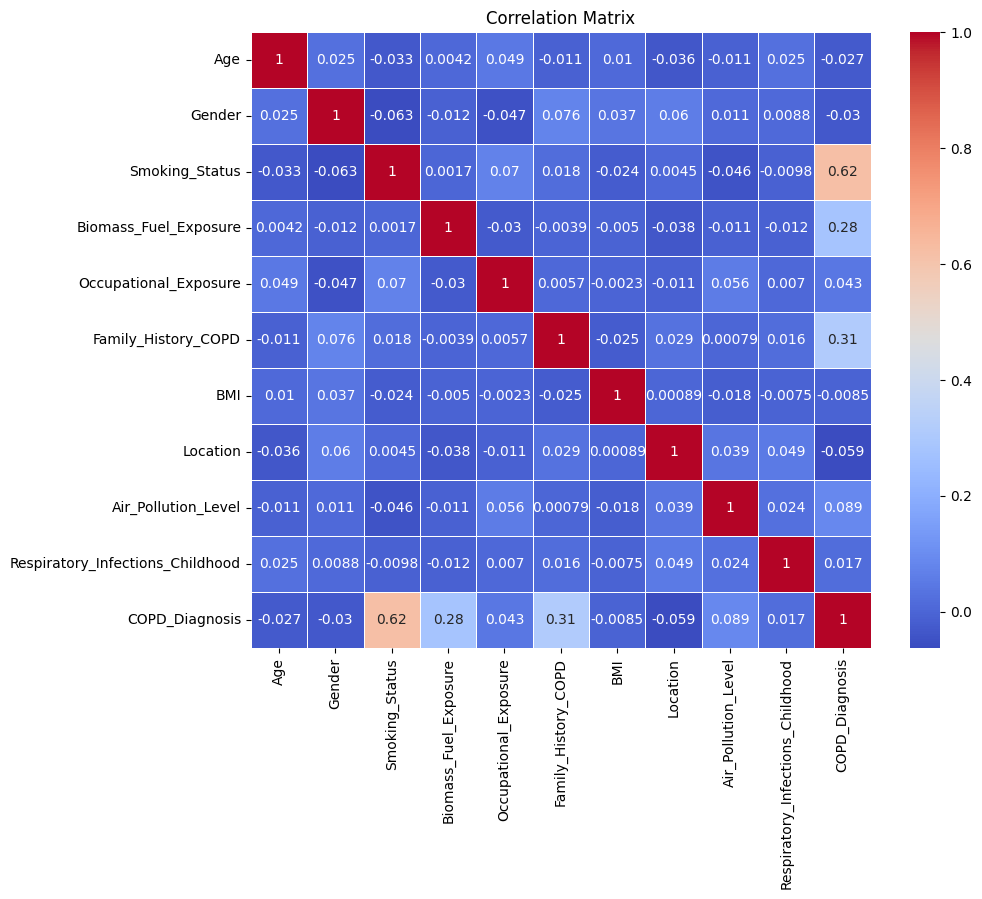

In [68]:
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### 2.2. Scatter Plots

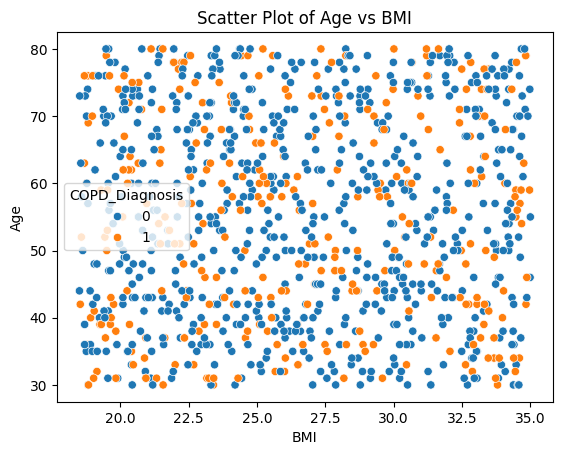

In [69]:
sns.scatterplot(x='BMI', y='Age', hue='COPD_Diagnosis', data=data)
plt.title('Scatter Plot of Age vs BMI')
plt.show()

#### 2.3. Pair Plot

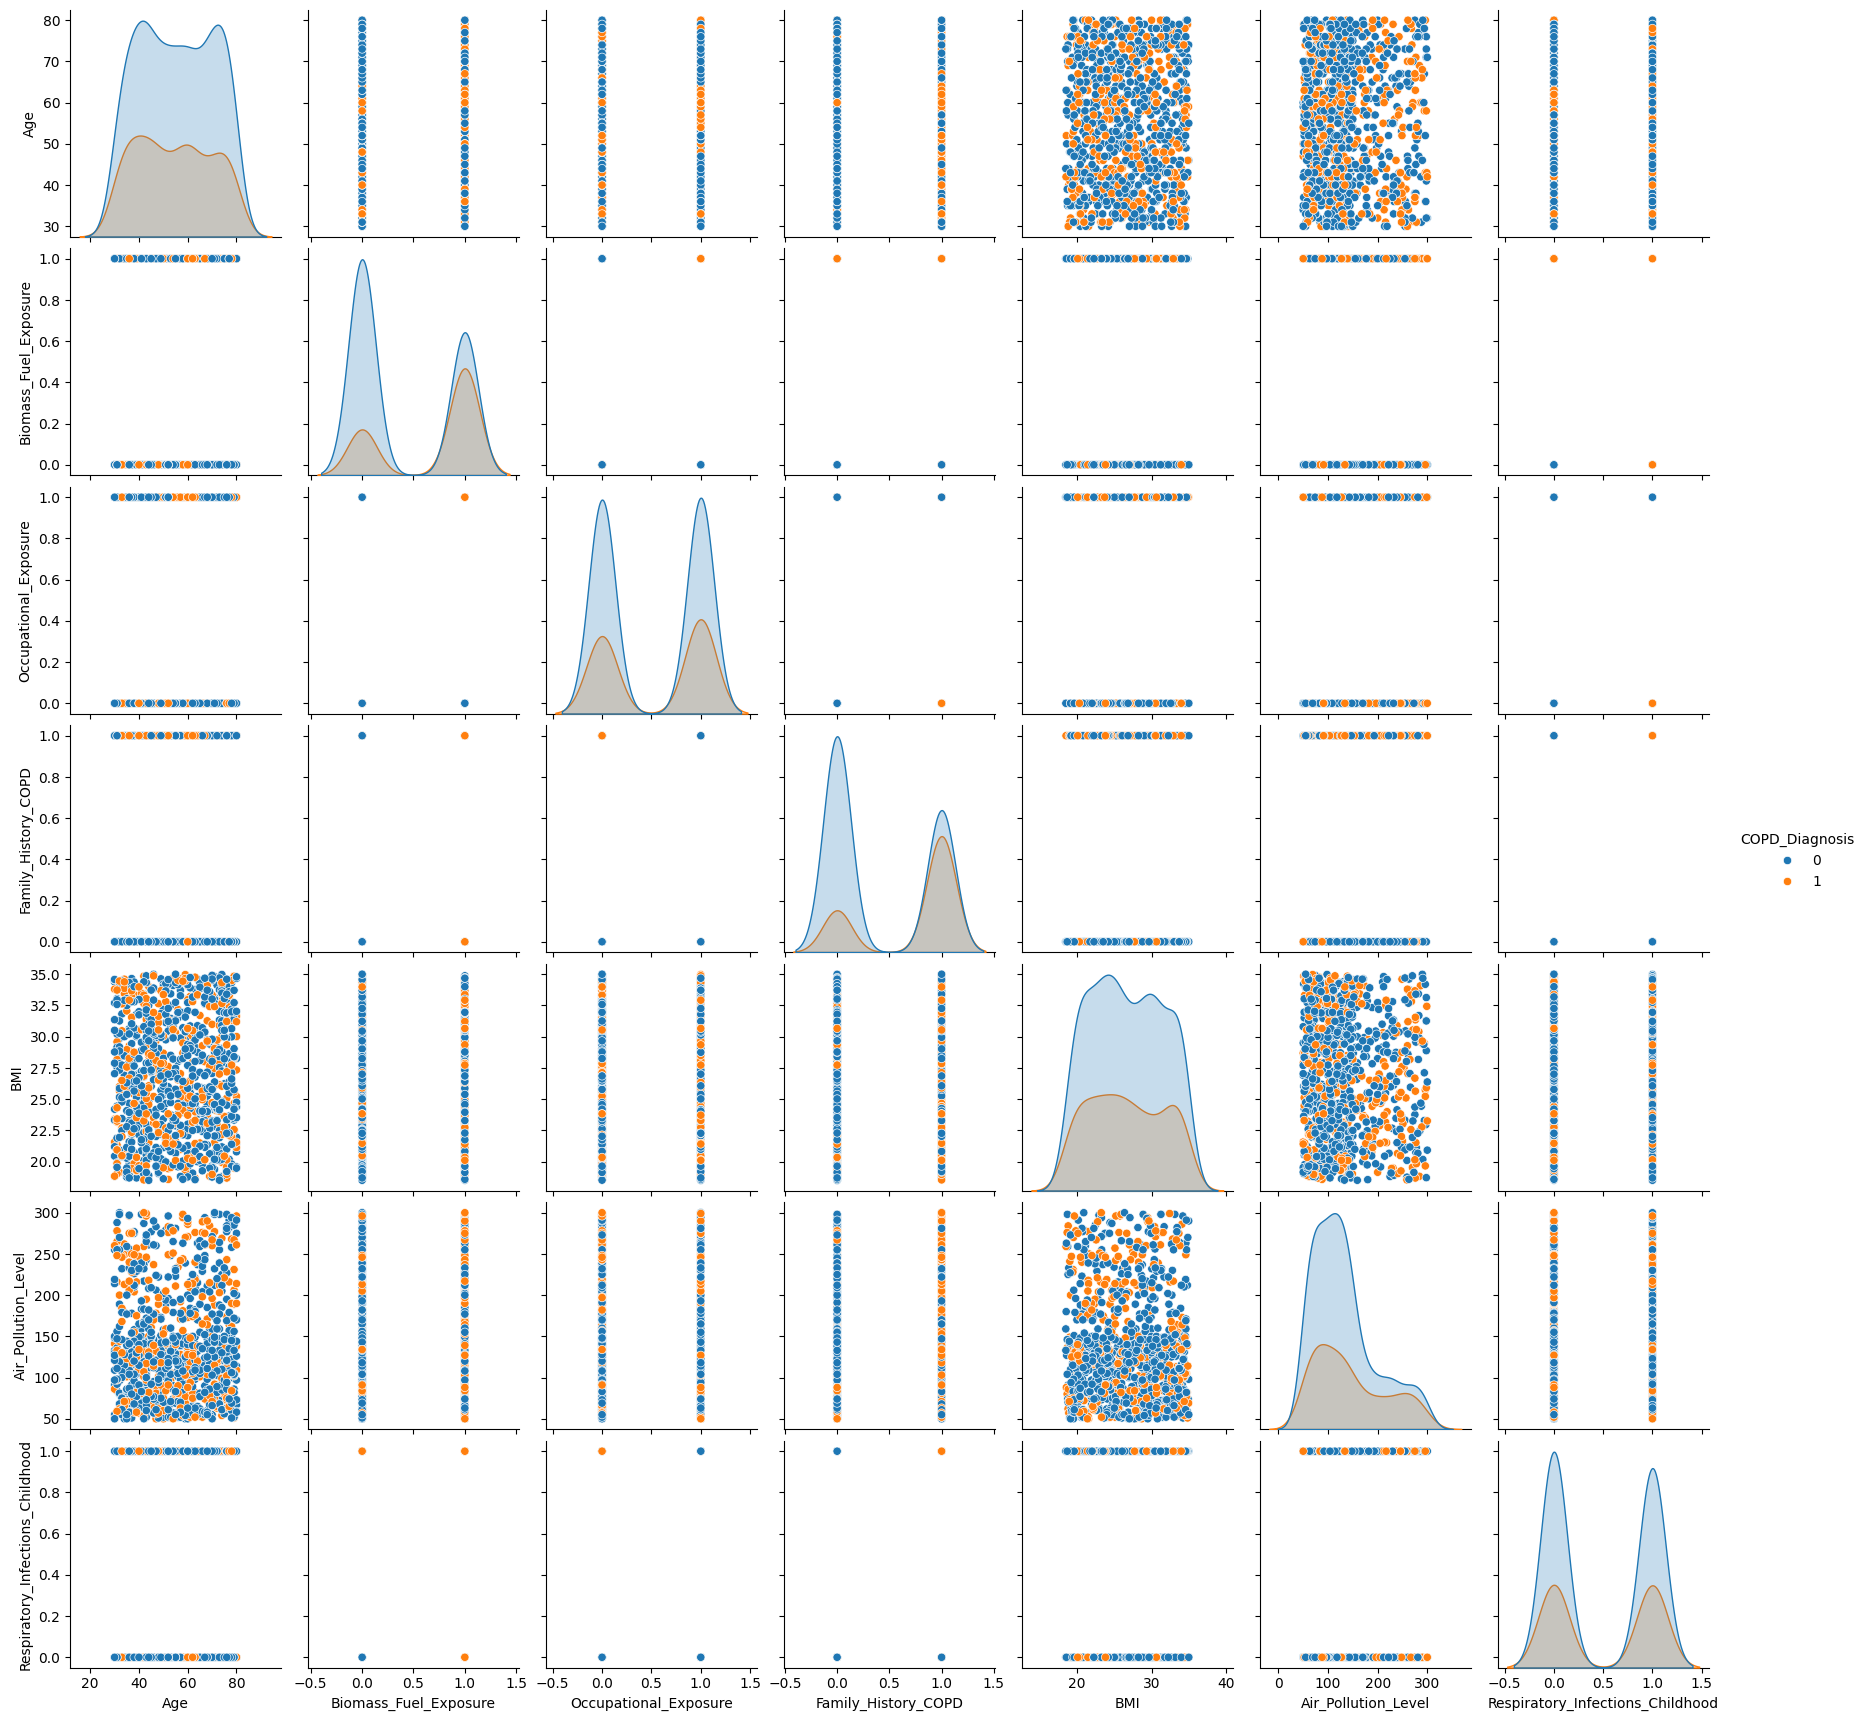

In [70]:
sns.pairplot(data, hue='COPD_Diagnosis')
plt.show()

### 3. Multivariate Analysis
#### 3.1. Violin Plots

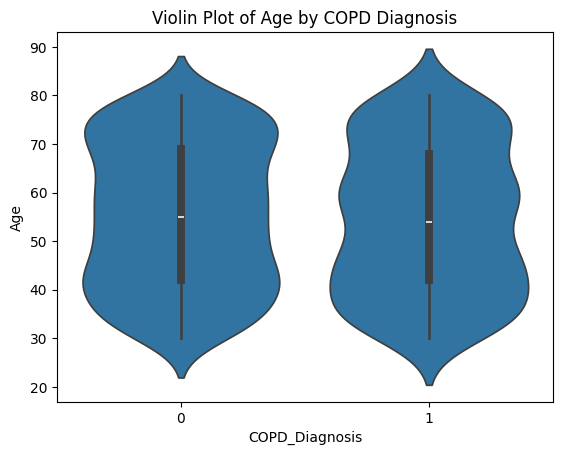

In [71]:
sns.violinplot(x='COPD_Diagnosis', y='Age', data=data)
plt.title('Violin Plot of Age by COPD Diagnosis')
plt.show()